#### Data Exploration:
##### Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("Employee.csv")

In [99]:
# List unique values and their lengths for each feature
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    if(column != "Age" or column != "Salary"):
        print(f"Unique values: {unique_values}")  # Display first 10 unique values
    else:
        print(f"Unique values: {unique_values[:10]}")  # Display first 10 unique values

Company: 7 unique values
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 30 unique values
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: 41 unique values
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: 12 unique values
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 unique values
Unique values: ['India']
Gender: 2 unique values
Unique values: [0 1]


In [101]:
# Generate descriptive statistics for numerical columns
stats = df.describe(include=[np.number])
print("Statistical Analysis:\n", stats)

# Generate statistics for categorical columns
categorical_stats = df.describe(include=['object'])
print("Categorical Data Analysis:\n", categorical_stats)

Statistical Analysis:
               Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000
Categorical Data Analysis:
        Company   Place Country
count      140     134     148
unique       6      11       1
top        TCS  Mumbai   India
freq        53      37     148


#### Data Cleaning:
##### Find the missing and inappropriate values, treat them appropriately.
##### Remove all duplicate rows.
##### Find the outliers.
##### Replace the value 0 in age as NaN
##### Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


In [103]:
# replace and keep the unique name
df["Company"] = df["Company"].replace("Tata Consultancy Services", "TCS")
df["Company"] = df["Company"].replace("Infosys Pvt Lmt", "Infosys")

In [105]:
df['Company'].fillna(value="Wipro", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18660\3875021966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna(value="Wipro", inplace=True)


In [107]:
df['Place'].fillna(value="Bengaluru", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18660\2304249500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Place'].fillna(value="Bengaluru", inplace=True)


In [109]:
df['Place'].isnull().sum()

0

In [111]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Bengaluru', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [113]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144     True
145    False
146    False
147    False
Length: 148, dtype: bool

In [115]:
duplicated_items = df.duplicated()
print('Before Duplicated Removal - ', len(duplicated_items))
df = df.drop_duplicates()
duplicated_items = df.duplicated()
print('After Duplicated Removal - ', len(duplicated_items))

Before Duplicated Removal -  148
After Duplicated Removal -  144


In [297]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [117]:
# Detect and remove outliers using IQR method
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df["Salary"] >= Q1 - 1.5 * IQR) & (df["Salary"] <= Q3 + 1.5 * IQR)]
df_filtered.describe()

,Age,Salary,Gender
count,105.000000,121.000000,121.000000
mean,30.447619,5283.471074,0.264463
std,11.615624,2585.373600,0.442881
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,38.000000,8000.000000,1.000000
max,54.000000,9876.000000,1.000000


In [119]:
print(df['Age'].isna().sum())
df['Age'].fillna(value=0, inplace=True)
print(df['Age'].isna().sum())

17
0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18660\512349376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=0, inplace=True)


In [121]:
print(df['Salary'].isna().sum())
df['Salary'].fillna(value=df['Salary'].mean(), inplace=True)
print(df['Salary'].isna().sum())

23
0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18660\1520889792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(value=df['Salary'].mean(), inplace=True)


#### Data Analysis:
##### Filter the data with age >40 and salary<5000
##### Plot the chart with age and salary
##### Count the number of people from each place and represent it visually

In [123]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] > 5000)]
print(filtered_data)

    Company   Age       Salary       Place Country  Gender
9       CTS  45.0  9000.000000       Delhi   India       0
12      CTS  45.0  5283.471074     Chennai   India       0
27      CTS  45.0  9284.000000       Delhi   India       1
30      CTS  46.0  7654.000000     Chennai   India       0
45      CTS  46.0  9000.000000   Hyderabad   India       1
48      CTS  43.0  5283.471074      Mumbai   India       0
63      CTS  41.0  9284.000000   Bengaluru   India       1
66      CTS  41.0  5283.471074    Calcutta   India       0
81      CTS  43.0  9000.000000        Pune   India       1
99      CTS  44.0  9284.000000  Podicherry   India       1
102     CTS  44.0  5283.471074      Mumbai   India       0
117     CTS  44.0  9876.000000   Bengaluru   India       1
120     CTS  44.0  5283.471074   Hyderabad   India       0


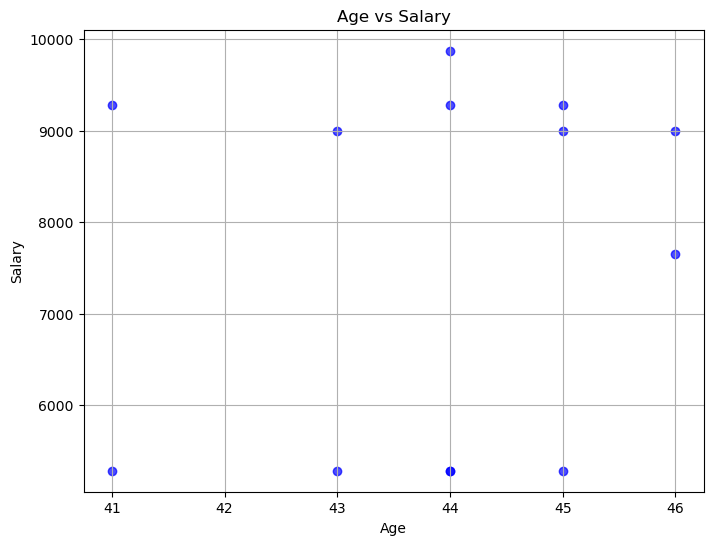

In [125]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Age'], filtered_data['Salary'], color='blue', alpha=0.7)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

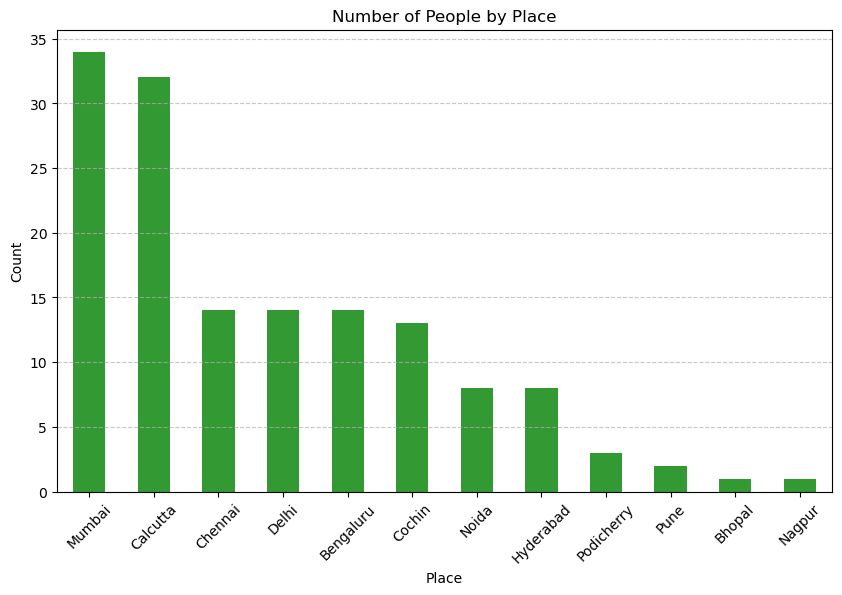

In [127]:
# Counting people from each place
place_counts = df['Place'].value_counts()

# Bar plot for people count from each place
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='green', alpha=0.8)
plt.title('Number of People by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Data Encoding
##### Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, 
##### making them suitable for analysis by machine learning algorithms.

In [129]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encode the 'Gender' column
label_encoder = LabelEncoder()
df['company_encoded'] = label_encoder.fit_transform(df['Company'])

# Check the unique encoding
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'CTS': 0, 'Congnizant': 1, 'Infosys': 2, 'TCS': 3, 'Wipro': 4}


In [131]:
df['company_encoded']

0      3
1      2
2      3
3      2
4      3
      ..
142    2
143    3
145    2
146    3
147    2
Name: company_encoded, Length: 144, dtype: int32

In [133]:
# Example: One-hot encode the 'Place' column
one_hot_encoded = pd.get_dummies(df['Place'], prefix='Place')

# Merge the encoded columns back into the DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'Place' column if needed
#df.drop('place', axis=1, inplace=True)

print(df.head())

   Company   Age       Salary     Place Country  Gender  company_encoded  \
0      TCS  20.0  5283.471074   Chennai   India       0                3   
1  Infosys  30.0  5283.471074    Mumbai   India       0                2   
2      TCS  35.0  2300.000000  Calcutta   India       0                3   
3  Infosys  40.0  3000.000000     Delhi   India       0                2   
4      TCS  23.0  4000.000000    Mumbai   India       0                3   

   Place_Bengaluru  Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
0            False         False           False           True         False   
1            False         False           False          False         False   
2            False         False            True          False         False   
3            False         False           False          False         False   
4            False         False           False          False         False   

   Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nag

In [135]:
df

,Company,Age,Salary,Place,Country,Gender,company_encoded,Place_Bengaluru,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,TCS,20.0,5283.471074,Chennai,India,0,3,False,False,False,True,False,False,False,False,False,False,False,False
1,Infosys,30.0,5283.471074,Mumbai,India,0,2,False,False,False,False,False,False,False,True,False,False,False,False
2,TCS,35.0,2300.000000,Calcutta,India,0,3,False,False,True,False,False,False,False,False,False,False,False,False
3,Infosys,40.0,3000.000000,Delhi,India,0,2,False,False,False,False,False,True,False,False,False,False,False,False
4,TCS,23.0,4000.000000,Mumbai,India,0,3,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys,22.0,8202.000000,Mumbai,India,0,2,False,False,False,False,False,False,False,True,False,False,False,False
143,TCS,33.0,9024.000000,Calcutta,India,1,3,False,False,True,False,False,False,False,False,False,False,False,False
145,Infosys,44.0,4034.000000,Delhi,India,1,2,False,False,False,False,False,True,False,False,False,False,False,False
146,TCS,33.0,5034.000000,Mumbai,India,1,3,False,False,False,False,False,False,False,True,False,False,False,False


#### Feature Scaling
##### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [141]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting features for scaling
features_to_scale = ['Age', 'Salary', 'company_encoded', 'Place_Chennai', 'Place_Bengaluru']

# StandardScaler:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# MinMaxScaler:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Displaying the scaled datasets
print("Standard Scaled Data:\n", df_standard_scaled.head())
print("\nMinMax Scaled Data:\n", df_minmax_scaled.head())

Standard Scaled Data:
    Company       Age    Salary     Place Country  Gender  company_encoded  \
0      TCS -0.483417  0.000000   Chennai   India       0         0.805806   
1  Infosys  0.214798  0.000000    Mumbai   India       0         0.011038   
2      TCS  0.563906 -1.264122  Calcutta   India       0         0.805806   
3  Infosys  0.913014 -0.967526     Delhi   India       0         0.011038   
4      TCS -0.273953 -0.543818    Mumbai   India       0         0.805806   

   Place_Bengaluru  Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
0        -0.328165         False           False       3.047247         False   
1        -0.328165         False           False      -0.328165         False   
2        -0.328165         False            True      -0.328165         False   
3        -0.328165         False           False      -0.328165         False   
4        -0.328165         False           False      -0.328165         False   

   Place_Delhi  Place_Hyder